In [30]:
%matplotlib notebook
import numpy as np
from astropy.table import Table, setdiff, join
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
plt.ion()

Rautocut = 22.9

# Load v7.0

In [5]:
v7 = photcat = Table().read('../catalogs/personal_catalogs/megacat.fits')
v7['Rauto'] = 23.9 - 2.5*np.log10(v7['fRauto'])
v7 = v7['field', 'ids', 'ra', 'dec', 'Rauto']
v7 = v7.filled(99)

/Users/matthewkirby/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


# Load v5.6

In [6]:
v5 = Table().read('../oldcode/galactic_evolution/catalog/megacat.v5.6.dat', format='ascii.fast_no_header')

In [7]:
v5.rename_column('col1', 'field')
v5.rename_column('col2', 'ids')
v5.rename_column('col3', 'ra')
v5.rename_column('col4', 'dec')
v5.rename_column('col19', 'Rauto')
v5.rename_column('col23', 'Q')

# Match the photometry

In [9]:
v5coords = SkyCoord(ra=v5['ra']*u.degree, dec=v5['dec']*u.degree)
v7coords = SkyCoord(ra=v7['ra']*u.degree, dec=v7['dec']*u.degree)

In [11]:
# the nth element of idx is in the index in v7coords that best matches the nth element in v5coords
idx, d2d, d3d = v5coords.match_to_catalog_sky(v7coords)
# Only keep when slit-obj sep is less than 1 arcsecond
#close_idx = idx[np.where(d2d < 1.*u.arcsecond)[0]]

In [12]:
v5['Rauto_v7'] = v7['Rauto'][idx]
v5['v5v7_2dsep'] = d2d.arcsecond
v5['ra7'] = v7['ra'][idx]
v5['dec7'] = v7['dec'][idx]

In [13]:
matched = v5[np.where(v5['v5v7_2dsep'] <= 1.)]
onlyold = v5[np.where(v5['v5v7_2dsep'] > 1.0)]

In [14]:
print(len(matched), len(v5), len(onlyold), len(v7))

375823 497375 121552 385179


# Calculate statistics on the photometry shift

In [37]:
matched['dRauto'] = matched['Rauto'] - matched['Rauto_v7']
matchedcut = matched[np.where((matched['Rauto_v7'] < Rautocut) &
                              (matched['dRauto'] < 1.0) &
                              (matched['dRauto'] > -1.0))]

In [38]:
np.mean(np.abs(matchedcut['dRauto']))

0.19121923040163122

<IPython.core.display.Javascript object>


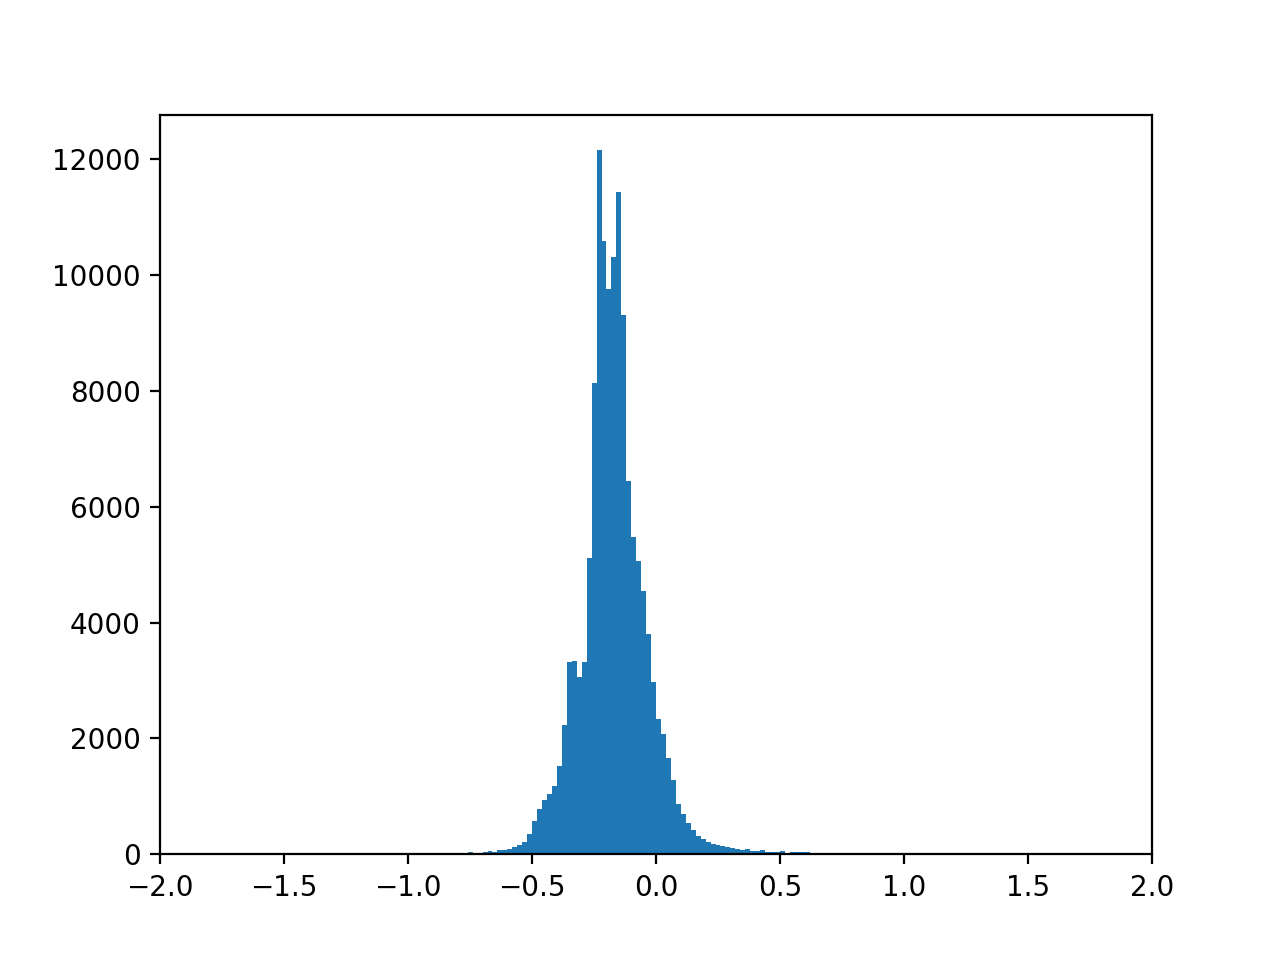

(-2, 2)

In [40]:
plt.hist(matchedcut['dRauto'], bins=100);
plt.gca().set_xlim([-2,2])